In [1]:
import torch
import numpy as np 
import os
from ultralytics import YOLO, settings

In [2]:
settings.update({
    'mlflow': True,
    'clearml': False,
    'comet': False,
    'dvc': False,
    'hub': False,
    'neptune': False,
    'raytune': False,
    'tensorboard': False,
    'wandb': False
})
settings

{'settings_version': '0.0.4',
 'datasets_dir': 'C:\\Users\\lucaz\\Desktop\\AI study\\pupptesFinder\\datasets',
 'weights_dir': 'weights',
 'runs_dir': 'runs',
 'uuid': '0b2f0ca37c9a0657d6a534fa0724de426be12b1ec8dc65e886ea1099893f42be',
 'sync': True,
 'api_key': '',
 'openai_api_key': '',
 'clearml': False,
 'comet': False,
 'dvc': False,
 'hub': False,
 'mlflow': True,
 'neptune': False,
 'raytune': False,
 'tensorboard': False,
 'wandb': False}

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Prepare dataset


In [4]:
DATASET_ROOT_PATH = "./dataset/"
TRAIN_PATH = os.path.join(DATASET_ROOT_PATH, "train")
TEST_PATH = os.path.join(DATASET_ROOT_PATH, "test")

In [5]:
from dataset import TrainDataSet
from utils import build_csv, resizing_images

dataset_train_orig = os.path.join(TRAIN_PATH, "data_train")
build_csv(folder_path=dataset_train_orig, output_path=dataset_train_orig)



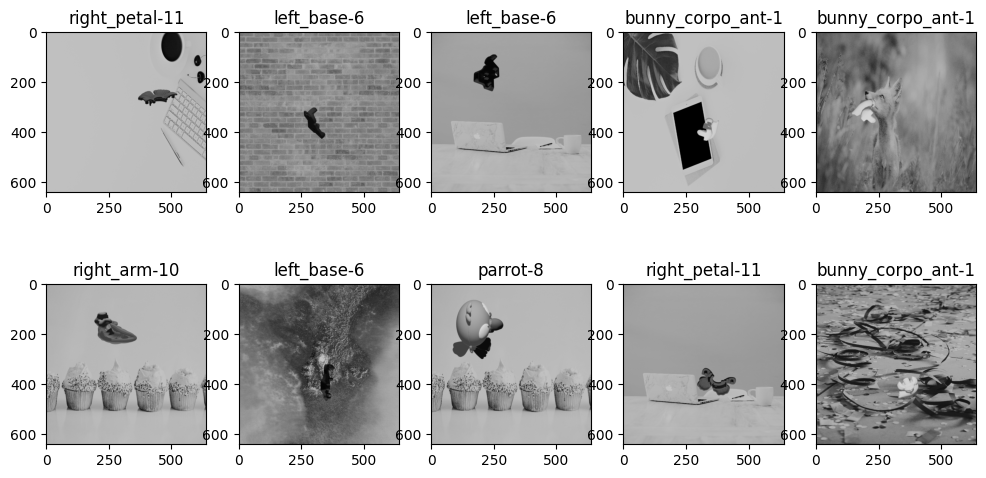

Num of classes:  12 
 They are:  ['base' 'bunny_corpo_ant' 'dragon_mask' 'head' 'helmet' 'juno_front_top' 'left_base' 'main_body' 'parrot' 'rear_body' 'right_arm' 'right_petal']


In [6]:
entire_dataset = TrainDataSet(
        csv_file=os.path.join(dataset_train_orig, "resume_images.csv"), root_dir="", transform=None
    )
entire_dataset.show_dataset(10)
output = os.path.join(TRAIN_PATH, "./data4train")
entire_dataset.get_bounding_box(output_folder=output, val_split=0)

classes = entire_dataset.get_classes()

Train Yolo

In [12]:


# for i in range(1):
model = YOLO("yolov8x.pt")
model.to(device=device)
# epochs = int(np.random.choice(range(30, 51)))
# batch = int(np.random.choice([2, 4, 8, 16, 32]))
# optimizer = str(np.random.choice(["SGD", "Adam", "NAdam", "RAdam", "RMSProp"]))
# dropout = float(np.random.choice([0, 0.1, 0.2, 0.3, 0.5]))
model.train(data="model/config.yaml", epochs=100, batch=2, imgsz=640, optimizer="RAdam", iterations=5, freeze=10, lr0=0.00965, dropout=0.2, lrf=0.01048, fliplr= 0.37093)
del model
torch.cuda.empty_cache()

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


KeyError: 'backbone'

In [6]:
model = YOLO("./runs/detect/train3/weights/best.pt")
model.val(data="./model/config.yaml")

Ultralytics YOLOv8.2.35  Python-3.10.10 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\lucaz\Desktop\AI study\pupptesFinder\dataset\train\data4train\labels\val.cache... 216 images, 0 backgrounds, 0 corrupt: 100%|██████████| 216/216 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.85it/s]


                   all        216        216      0.577      0.127      0.119     0.0674
                  base         16         16      0.905      0.125      0.245      0.135
       bunny_corpo_ant         13         13       0.95     0.0769      0.129      0.109
           dragon_mask         18         18          1          0     0.0119    0.00416
                  head         18         18      0.771     0.0556      0.146     0.0787
                helmet         18         18     0.0275      0.278     0.0844     0.0278
        juno_front_top         20         20          0          0     0.0138    0.00325
             left_base         18         18          0          0     0.0294    0.00881
             main_body         17         17          1          0      0.019    0.00872
                parrot         18         18      0.236      0.833      0.692      0.409
             rear_body         14         14          1          0    0.00429    0.00123
             right_ar

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001DADD6E85B0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504